# Disciplina de Aprendizado de Máquina não supervisionado

## Aula 06

### Clusterização de Informações Textuais

### Parte I: Visão Geral

Os algoritmos de *clusterização* de textos são os mesmos utilizados para dados estruturados. O diferencial está no pré-processamento que necessita ser realizado, o qual tem o objetivo de transformar um texto, ou melhor, um conjunto de documentos, em uma matriz de similaridades que possa ser processada por um algoritmo de *clusterização*.

Antes de seguirmos adiante, é importante estudarmos o vocabulário associado.


---

#### **Glossário**
- **Corpus**: conjunto de textos; compilação de documentos ou informações relativos a uma disciplina ou um tema. Plural: *corpora*.
- **Token**: é o nome dado às ocorrências individuais de unidades linguísticas (tanto escritas quanto faladas), que são extraídas de um texto; unidade de análise. 
- **Stop-Word** (palavra vazia): palavra irrelevante para o processo de análise textual, e que pode, portanto, ser ignorada.
- **Frequência absoluta ($n$)**: indicador que representa o número de ocorrências de um *termo* ou *token* em um documento ou *corpus*.
- **Frequência do termo ($tf$)**: *term frequency* é um indicador que corresponde à frequência relativa, i.e., número ocorrências de um termo em relação ao tamanho de um documento (peso proporcional do termo em um documento). Corresponde a $n / totalTermosDocto$ 
- **Frequência inversa de documentos ($idf$)**: *inverse document frequency* é um indicador que corresponde ao inverso da fração de documentos em que o termo aparece. 
- [**$tf-idf$**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf): métrica que avalia o peso (i.e., a importância) de uma palavra considerando não só a importância de um termo no documento, mas também se ele aparece muito ou pouco em outros documentos. Ela diminui a importância dos termos mais frequentes e amplia a importância dos mais raros.
- **[Modelo Espaço-Vetorial](https://en.wikipedia.org/wiki/Vector_space_model)**: modelo de representação de documentos onde um vetor de identificadores (termos) é usado para representar o conteúdo dos documentos.
- **[Bag-of-Words](https://wikipedia.org/wiki/bag-of-words)** (saco de palavras): é um esquema de representação de documentos do tipo Espaço-Vetorial, onde cada documento é representado por um vetor de termos e suas respectivas frequências. Como não há uma ordem definida nem uma semântica associada, esse é chamado de *saco de palavras*.

---

#### Parte II: Preprocessamento

Antes de iniciar qualquer processo de *clusterização* textual, devemos preprocessar os documentos ou textos em questão, seguindo uma série de etapas: *tokenização*, remoção de [stopwords](https://pt.wikipedia.org/wiki/Palavra_vazia), [*stemmização*](https://pt.wikipedia.org/wiki/Stemiza%C3%A7%C3%A3o), ponderação e, finalmente, seleção de *features*.

Vamos estudar cada uma dessas etapas.

Antes de tudo, precisamos definir (ou carregar, se você preferir) um conjunto de textos de exemplo a serem processados:

In [39]:
# define um texto a ser processado
texto = ["Violência simbólica é um conceito social elaborado pelo\n",
  "sociólogo francês Pierre Bourdieu, o qual aborda uma forma\n",
  "de violência exercida pelo corpo sem coação física, causando\n",
  "danos morais e psicológicos.",
  "Inclui algumas palavras soltas, repetidas com ou sem erros, ou variações morfológicas:",
  "simbolica, simbólica, sociavel, formato, solto, solta",
  "elaborada e elaborados"]

De posse de um texto (ou conjunto de textos), o primeiro passo consiste em decompor esse texto em unidades de processamento. No caso de textos, as unidades que estamos interessados são as palavras, ou melhor, os termos neles presentes. 

A essa etapa damos o nome de *tokenização*.

O trecho seguinte usa um *tokenizador* simples, que processa o texto que definimos anteriormente e o decompõe em uma lista de palavras. 

Há diferentes tipos de *tokenizadores* e eles possuem diferentes parâmetros e opções. Vamos ver alguns deles. 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd 

vetorizador = CountVectorizer() # conta ocorrências simples (por padrão, elimina palavras com menos de 2 caracteres!)
matriz_palavras = vetorizador.fit_transform(texto)

df_palavras = pd.DataFrame.from_dict(dict(zip(vetorizador.get_feature_names_out(),matriz_palavras.toarray().sum(axis=0))), orient="index", columns=['Freq'])
df_palavras.sort_values(by="Freq", ascending=False)

,Freq
violência,2
simbólica,2
pelo,2
sem,2
ou,2
solto,1
soltas,1
solta,1
sociólogo,1
sociavel,1


Perceba que alguns dos termos mais frequentes são palavras vazias (*stop words*), tais como artigos, preposições, conjunções e similares. Para o tipo de processamento estatístico que estamos realizando, elas podem ser removidas ou ignoradas. Em um *corpus* maior, normalmente dominam as frequências, não discriminando nada (consulte o termo `a` no Google para ter uma ideia). 

Podemos eliminar algumas delas. 

O trecho seguinte define algumas *stop words* e as identifica na tabela de termos. Se desejar, pode adicionar termos específicos do domínio, se for o caso.

In [41]:
# define lista de stopwords
stopwords_pt = ["um", "uma", "qual", "ou", "com", "pelo", "sem"]

df_palavras["stopword"] = df_palavras.index.isin(stopwords_pt)
df_palavras.sort_values(by="Freq", ascending=False)

,Freq,stopword
violência,2,False
simbólica,2,False
pelo,2,True
sem,2,True
ou,2,True
solto,1,False
soltas,1,False
solta,1,False
sociólogo,1,False
sociavel,1,False


Agora que já sabemos definir *stop words*, vamos adicioná-las ao *pipeline* de processamento.

O trecho seguinte informa ao *tokenizador* a lista de palavras vazias que ele pode desconsiderar do processo.

In [42]:
# Remove stopwords ao identificar palavras
vetorizador = CountVectorizer(stop_words=stopwords_pt) 
matriz_palavras = vetorizador.fit_transform(texto)

df_palavras2 = pd.DataFrame.from_dict(dict(zip(vetorizador.get_feature_names_out(),matriz_palavras.toarray().sum(axis=0))), orient="index", columns=['Freq'])
df_palavras2["stopword"] = df_palavras2.index.isin(stopwords_pt)
df_palavras2.sort_values(by="Freq", ascending=False)

,Freq,stopword
violência,2,False
simbólica,2,False
morfológicas,1,False
palavras,1,False
pierre,1,False
psicológicos,1,False
repetidas,1,False
simbolica,1,False
social,1,False
inclui,1,False


Ao longo dos anos, listas de *stopwords* foram sendo construidas pela comunidade, para várias linguagens. Atualmente, essas listas podem carregadas automaticamente. O exemplo seguinte carrega a lista de palavras vazias definidas pela comunidade, para a língua portuguesa.

In [43]:
import nltk
nltk.download('stopwords')

stopwords_pt = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Podemos verificar as palavras presentes na lista:

In [44]:
print(stopwords_pt)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

Vamos tentar identificar se estão presentes na lista que já havíamos processado:

In [45]:
df_palavras2["stopword"] = df_palavras2.index.isin(stopwords_pt)
df_palavras2.sort_values(by="Freq", ascending=False)

,Freq,stopword
violência,2,False
simbólica,2,False
morfológicas,1,False
palavras,1,False
pierre,1,False
psicológicos,1,False
repetidas,1,False
simbolica,1,False
social,1,False
inclui,1,False


Perceba que havíamos esquecido de uma (`de`)...

Vamos aplicar novamente o *tokenizador* utilizando a lista construída pela comunidade, e recriar a lista de palavras

In [46]:
vetorizador = CountVectorizer(stop_words=stopwords_pt) 
matriz_palavras = vetorizador.fit_transform(texto)

df_palavras2 = pd.DataFrame.from_dict(dict(zip(vetorizador.get_feature_names_out(),matriz_palavras.toarray().sum(axis=0))), orient="index", columns=['Freq'])
df_palavras2.sort_values(by="Freq", ascending=False)

,Freq
violência,2
simbólica,2
morfológicas,1
palavras,1
pierre,1
psicológicos,1
repetidas,1
simbolica,1
social,1
algumas,1


Bem, agora que já sabemos como excluir *stopwords*, vamos seguir em frente.

Uma etapa que pode ser aplicada é a de *stemização* (*stemming*), que reduz palavras que possuam alguma variação morfológica a uma base comum -- o seu "tronco" (*stem*).

Essa etapa não é obrigatória, mas pode ser interessante de ser aplicada. Por exemplo, na lista de palavras acima (célula anterior), podemos perceber que alguns termos são variações morfológicas (em gênero, número ou grau) de outras. 

Se pudéssemos agrupá-las, não só seu sentido seria capturado em uma única representação, mas também teríamos menos palavras para processar (isso é importante, pois veremos que cada palavra será uma dimensão específica no *dataset*).

O trecho de código seguinte faz isso:

In [47]:
# Biblioteca de stemização para língua portuguesa
from nltk.stem.snowball import PortugueseStemmer

#Instancia um stemizador
stemmer = PortugueseStemmer() 

df_palavras2['Stem']=df_palavras2.index.map(lambda x: stemmer.stem(x)) # aplica stemizador a cada palavra e cria nova coluna com resultado
df_palavras2.sort_values(by="Freq", ascending=False)

,Freq,Stem
violência,2,violênc
simbólica,2,simból
morfológicas,1,morfológ
palavras,1,palavr
pierre,1,pierr
psicológicos,1,psicológ
repetidas,1,repet
simbolica,1,simbol
social,1,social
algumas,1,algum


Perceba que várias acabam ficando com o mesmo *stem*:

In [48]:
# agrupa as palavras por 'stem' e soma frequências
# mostra somente as colunas 'Freq' e 'Stem' (ignora as outras)
# coloca o resultado em ordem decrescente de frequência
df_stems = df_palavras2[['Freq', 'Stem']].groupby('Stem').sum().reset_index().sort_values('Freq', ascending=False)
df_stems

,Stem,Freq
27,solt,3
8,elabor,3
29,violênc,2
23,simból,2
16,mor,1
28,variaçõ,1
26,sociólog,1
25,sociavel,1
24,social,1
22,simbol,1


Podemos verificar que a quantidade de termos diminuiu um pouco:

In [49]:
print(f"Quantidade de termos (com variações): {len(df_palavras2.index)}")
print(f"Quantidade de stems: {len(df_stems.index)}")

Quantidade de termos (com variações): 34
Quantidade de stems: 30


Em bases maiores, essa diferença pode ser mais alta e efetivamente compensar, em especial agrupando palavras que possuam sentido semelhante. 

Podemos, ainda, remover acentos, excluir números e demais elementos que eventualmente não sejam relevantes. Para cada uma dessas opções, há alternativas. Para conhecê-las, leia a documentação ([aqui](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) e [aqui](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)).

Para nosso exemplo, vamos aplicar somente a conversão para minúsculas (ativa por padrão), a remoção de *stopwords*, a remoção de acentos e o stemizador que já vimos.

O código seguinte integra tudo isso:

In [50]:
import nltk
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import PortugueseStemmer

texto = ["Violência simbólica é um conceito social elaborado pelo\n",
  "sociólogo francês Pierre Bourdieu, o qual aborda uma forma\n",
  "de violência exercida pelo corpo sem coação física, causando\n",
  "danos morais e psicológicos.",
  "Inclui algumas palavras soltas, repetidas com ou sem erros, ou variações morfológicas:",
  "simbolica, simbólica, sociavel, formato, solto, solta",
  "elaborada e elaborados"]

nltk.download('stopwords')
stopwords_pt = nltk.corpus.stopwords.words('portuguese')

stemmer = PortugueseStemmer()

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

vetorizador = CountVectorizer(stop_words=stopwords_pt, tokenizer=stemmed_words, strip_accents='ascii') 
matriz_palavras = vetorizador.fit_transform(texto)

df_palavras = pd.DataFrame.from_dict(dict(zip(vetorizador.get_feature_names_out(),matriz_palavras.toarray().sum(axis=0))), orient="index", columns=['Freq'])
df_palavras.sort_values(by="Freq", ascending=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'ate', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivess', 'fom', 'form', 'foss', 'ha', 'haj', 'hao', 'hav', 'houv', 'houveri', 'houvess', 'ja', 'mesm', 'minh', 'muit', 'nao', 'noss', 'par', 'pel', 'quand', 'sao', 'sej', 'sera', 'seri', 'so', 'som', 'tamb', 'tenh', 'ter', 'tera', 'teri', 'tev', 'tinh', 'tiv', 'tivess', 'voc'] not in stop_words.
  % sorted(inconsistent)


,Freq
solt,3
simbol,3
elabor,3
violenc,2
pel,2
mor,1
variaco,1
sociolog,1
sociavel,1
social,1


Segue um gráfico em barras horizontais que ilustra essas frequências. Em um corpus maior (e extrapolando para os termos utilizados em uma lingua), linguistas perceberam que a frequência de uso das palavras não é uniforme, mas varia bastante.

De fato, perceberam que existe um conjunto relativamente pequeno de palavras que representam grande parte dos *tokens* em um corpus, mas muitas palavras de baixa frequência. De fato, `Zipf` (um linguista) provou que as frequências são proporcionais e obedecem a uma equação que foi batizada de `lei de Zipf`. Nela, a palavra mais frequente (com $r=1$ no ranking de frequências) teria uma frequência proporcional a `1`. A segunda mais frequente ($r=2$) teria  frequência proporcional a $1/2^\alpha$, a terceira ($r=3$) a $1/3^\alpha$, e assim por diante.

Para obter detalhes sobre a Lei de Zipf, consulte os seguintes materiais:

- [Zipf's law (Wikipedia)](https://en.wikipedia.org/wiki/Zipf%27s_law)
- [Zipf’s word frequency law in natural language: A critical review and future directions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/)

<BarContainer object of 30 artists>

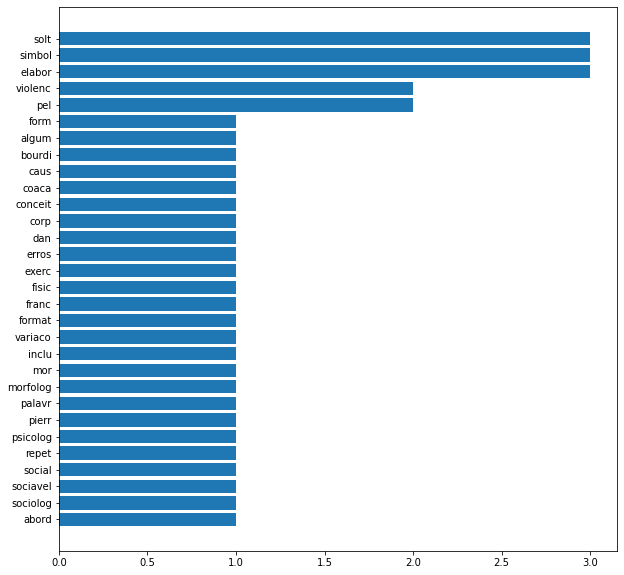

In [51]:
import matplotlib.pyplot as plt

palavras = df_palavras.sort_values(by="Freq", ascending=True)
plt.figure(figsize=(10,10))
plt.barh(palavras.index, palavras['Freq'])

Finalmente, um aspecto muito importante diz respeito a como cada elemento (que no caso seria um texto, frase ou documento) é representado.

Para a clusterização, necessitamos criar uma tabela similar às tabelas que já vimos: uma tabela que represente os elementos e seus valores em cada dimensão. No caso de textos, as dimensões são justamente as palavras que fazem parte do vocabulário utilizado em todos os textos sendo analisados. Então, para cada texto (cada linha), teremos a informação de quais palavras aparecem nele (nas colunas). Essa informação de palavras presentes nos documentos pode ser ponderada de diferentes maneiras, dependendo da importância (peso ou ponderação) de cada palavra em cada texto. Essa matriz, no caso de textos, é chamada de [matriz documento-termo](https://en.wikipedia.org/wiki/Document-term_matrix).

Diante disso, temos pelo menos 2 possibilidades de representação:
1. Para cada palavra (coluna), marcamos `1` se o elemento correspondente (texto) tem ou não aquela palavra presente em seu conteúdo e `0` se não estiver. Essa alternativa é semelhante ao que fizemos para variáveis categóricas binárias, visto na aula anterior;
2. Para cada palavra, podemos avaliar a quantidade de vezes que ocorrem em um texto e usar essa informação (de maneira absoluta) como importância ou peso da palavra naquele documento. 

Para a opção 2, há diferentes maneiras de avaliar o peso ou importância de cada palavra em um documento. 

As principais seriam (mas há outras):

1. frequência relativa
2. tf-idf 

A seguir vamos ver o resultado que é obtido por cada uma delas:

In [52]:
# TRECHO DE CÓDIGO COMUM AOS 3 CASOS
import nltk
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import PortugueseStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

texto = ["Violência simbólica é um conceito social elaborado pelo\n",
  "sociólogo francês Pierre Bourdieu, o qual aborda uma forma\n",
  "de violência exercida pelo corpo sem coação física, causando\n",
  "danos morais e psicológicos.",
  "Inclui algumas palavras soltas, repetidas com ou sem erros, ou variações morfológicas:",
  "simbolica, simbólica, sociavel, formato, solto, solta",
  "elaborada e elaborados"]

nltk.download('stopwords')
stopwords_pt = nltk.corpus.stopwords.words('portuguese')

stemmer = PortugueseStemmer()

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# CASO 1: VETOR BINARIO
vet_binario = CountVectorizer(stop_words=stopwords_pt, tokenizer=stemmed_words, strip_accents='ascii', binary=True) 
m_binaria_palavras = vet_binario.fit_transform(texto)
df_bin = pd.DataFrame(m_binaria_palavras.toarray(), columns=vet_binario.get_feature_names_out())
df_bin

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'ate', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivess', 'fom', 'form', 'foss', 'ha', 'haj', 'hao', 'hav', 'houv', 'houveri', 'houvess', 'ja', 'mesm', 'minh', 'muit', 'nao', 'noss', 'par', 'pel', 'quand', 'sao', 'sej', 'sera', 'seri', 'so', 'som', 'tamb', 'tenh', 'ter', 'tera', 'teri', 'tev', 'tinh', 'tiv', 'tivess', 'voc'] not in stop_words.
  % sorted(inconsistent)


,abord,algum,bourdi,caus,coaca,conceit,corp,dan,elabor,erros,...,pierr,psicolog,repet,simbol,social,sociavel,sociolog,solt,variaco,violenc
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# CASO 2: VETOR DE FREQUÊNCIAS ABSOLUTAS
vet_freq_abs = CountVectorizer(stop_words=stopwords_pt, tokenizer=stemmed_words, strip_accents='ascii') 
m_freq_abs_palavras = vet_freq_abs.fit_transform(texto)
df_abs = pd.DataFrame(m_freq_abs_palavras.toarray(), columns=vet_freq_abs.get_feature_names_out())
df_abs

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'ate', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivess', 'fom', 'form', 'foss', 'ha', 'haj', 'hao', 'hav', 'houv', 'houveri', 'houvess', 'ja', 'mesm', 'minh', 'muit', 'nao', 'noss', 'par', 'pel', 'quand', 'sao', 'sej', 'sera', 'seri', 'so', 'som', 'tamb', 'tenh', 'ter', 'tera', 'teri', 'tev', 'tinh', 'tiv', 'tivess', 'voc'] not in stop_words.
  % sorted(inconsistent)


,abord,algum,bourdi,caus,coaca,conceit,corp,dan,elabor,erros,...,pierr,psicolog,repet,simbol,social,sociavel,sociolog,solt,variaco,violenc
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,2,0,0
6,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# CASO 3: VETOR DE FREQUÊNCIAS RELATIVAS
# repare no use_idf=False e no morm=l1
pd.set_option('display.float_format', '{:.4f}'.format) # ajusta saída do dataframe para 5 casas após a vírgula
vet_tf = TfidfVectorizer(use_idf=False, lowercase=True, stop_words=stopwords_pt, tokenizer=stemmed_words, strip_accents="ascii", norm="l1")
m_tf_palavras = vet_tf.fit_transform(texto)
df_tf = pd.DataFrame(m_tf_palavras.toarray(), columns=vet_tf.get_feature_names_out())
df_tf

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'ate', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivess', 'fom', 'form', 'foss', 'ha', 'haj', 'hao', 'hav', 'houv', 'houveri', 'houvess', 'ja', 'mesm', 'minh', 'muit', 'nao', 'noss', 'par', 'pel', 'quand', 'sao', 'sej', 'sera', 'seri', 'so', 'som', 'tamb', 'tenh', 'ter', 'tera', 'teri', 'tev', 'tinh', 'tiv', 'tivess', 'voc'] not in stop_words.
  % sorted(inconsistent)


,abord,algum,bourdi,caus,coaca,conceit,corp,dan,elabor,erros,...,pierr,psicolog,repet,simbol,social,sociavel,sociolog,solt,variaco,violenc
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.0000,0.1667,0.0000,...,0.0000,0.0000,0.0000,0.1667,0.1667,0.0000,0.0000,0.0000,0.0000,0.1667
1,0.1667,0.0000,0.1667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.1667,0.0000,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.1429,0.1429,0.0000,0.1429,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1429
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,0.0000,...,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1250,...,0.0000,0.0000,0.1250,0.0000,0.0000,0.0000,0.0000,0.1250,0.1250,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.3333,0.0000,0.1667,0.0000,0.3333,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [56]:
# CASO 4: VETOR DE PESOS TF-IDF
vet_tf_idf = TfidfVectorizer(lowercase=True, stop_words=stopwords_pt, tokenizer=stemmed_words, strip_accents="ascii")
m_tf_idf_palavras = vet_tf_idf.fit_transform(texto)
df_tf_idf = pd.DataFrame(m_tf_idf_palavras.toarray(), columns=vet_tf_idf.get_feature_names_out())
df_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'ate', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivess', 'fom', 'form', 'foss', 'ha', 'haj', 'hao', 'hav', 'houv', 'houveri', 'houvess', 'ja', 'mesm', 'minh', 'muit', 'nao', 'noss', 'par', 'pel', 'quand', 'sao', 'sej', 'sera', 'seri', 'so', 'som', 'tamb', 'tenh', 'ter', 'tera', 'teri', 'tev', 'tinh', 'tiv', 'tivess', 'voc'] not in stop_words.
  % sorted(inconsistent)


,abord,algum,bourdi,caus,coaca,conceit,corp,dan,elabor,erros,...,pierr,psicolog,repet,simbol,social,sociavel,sociolog,solt,variaco,violenc
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.4585,0.0000,0.0000,0.3806,0.0000,...,0.0000,0.0000,0.0000,0.3806,0.4585,0.0000,0.0000,0.0000,0.0000,0.3806
1,0.4082,0.0000,0.4082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.4082,0.0000,0.0000,0.0000,0.0000,0.0000,0.4082,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.3960,0.3960,0.0000,0.3960,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3287
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5774,0.0000,0.0000,...,0.0000,0.5774,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.3606,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3606,...,0.0000,0.0000,0.3606,0.0000,0.0000,0.0000,0.0000,0.2994,0.3606,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.6057,0.0000,0.3648,0.0000,0.6057,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Podemos verificar qual é a similaridade entre os documentos. Para tanto, podemos aplicar `cosine similarity`:

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
df_dist = pd.DataFrame(cosine_similarity(df_tf_idf))
df_dist

,0,1,2,3,4,5,6
0,1.0000,0.0000,0.2502,0.0000,0.0000,0.2305,0.3806
1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.2502,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.1813,0.0000
5,0.2305,0.0000,0.0000,0.0000,0.1813,1.0000,0.0000
6,0.3806,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


---
**Exercício 1**: 

Crie ou carregue alguns textos e aplique as etapas de processamento estudadas até o momento: tokenização, remoção de stopwords, stemização e identificação de relevância (peso) por tf-idf.

Após realizar o processamento:
1. Crie uma tabela que ilustre as palavras identificadas e suas repectivas frequências absolutas (sem as stopwords);
2. Indique (imprima na tela) quantas stopwords foram encontradas (e removidas) do corpus (quantidade total de stopwords e total de frequências/ocorrências); 
3. Crie uma matriz termo-documento que ilustre as frequências de termos por documento

In [58]:
# Fonte de dados:
# https://www.kaggle.com/datasets/diogocaliman/notcias-publicadas-no-brasil

texto_ex1 = [
    # economia
  "Mesmo com alta do dólar, gastos de brasileiros no exterior batem recorde",
  "Para Dilma, é 'apressada' a tese de que emergentes perderão dinamismo",
  "Temos sido capazes de reduzir a inflação', diz Tombini em Davos",
  "Governo argentino autoriza compra de dólares após queda do peso",
  "Petrobras desiste de parte da área de Bem-te-vi e amplia a de Carcará",
  "Consórcio deverá investir R$ 5,1 bilhões em linha de Belo Monte",
  # esportes
  "CR7 perde muitos gols, mas dá assistência e Real bate Osasuna",
  "Grêmio quita salários de Elano e libera meia para assinar com o Flamengo",
  "Reforço para o garrafão, Bábby já treina no Pinheiros: 'É uma honra'",
  "Lotus exibe carro da primeira vitória de Fittipaldi na F-1, no GP dos EUA de 70",
  "Justiça de SP determina que CBF devolva os quatro pontos à Lusa",
  "Central do Mercado: R10 fica no Galo, e Hernane pode deixar o Flamengo",
  # tecnologia
  "Como recuperar o PIN de segurança que é exigido na verificação em duas etapas no WhatsApp?",
  "França cria força-tarefa para estudar criptomoedas após Facebook anunciar Libra",
  "Google libera extensão para facilitar denúncia de sites maliciosos",
  "Google anuncia função que mostra se o ônibus ou o metrô estão lotados",
  "Polícia europeia prende grupo acusado de roubar 24 milhões de euros em criptomoedas",
  "Google anuncia cabo submarino conectando África e Europa"
]

In [59]:
# 1) Crie uma tabela que ilustre as palavras identificadas e suas repectivas frequências absolutas (sem as stopwords);
vetorizador = CountVectorizer(stop_words=stopwords_pt) 
matriz_palavras = vetorizador.fit_transform(texto_ex1)

df_palavras_sem_stopwords = pd.DataFrame.from_dict(dict(zip(vetorizador.get_feature_names_out(),matriz_palavras.toarray().sum(axis=0))), orient="index", columns=['Freq'])
df_palavras_sem_stopwords["stopword"] = df_palavras_sem_stopwords.index.isin(stopwords_pt)
print(df_palavras_sem_stopwords.sort_values(by="Freq", ascending=False))

print('Total de palavras sem stopwords: ', df_palavras_sem_stopwords['Freq'].sum())

              Freq  stopword
google           3     False
anuncia          2     False
criptomoedas     2     False
após             2     False
flamengo         2     False
...            ...       ...
diz              1     False
dinamismo        1     False
dilma            1     False
devolva          1     False
ônibus           1     False

[134 rows x 2 columns]
Total de palavras sem stopwords:  141


In [60]:
# 2) Indique (imprima na tela) quantas stopwords foram encontradas (e removidas) do corpus (quantidade total de stopwords e total de frequências/ocorrências);
vetorizador = CountVectorizer() # conta ocorrências simples (por padrão, elimina palavras com menos de 2 caracteres!)
matriz_palavras = vetorizador.fit_transform(texto_ex1)

df_palavras_com_stopwords = pd.DataFrame.from_dict(dict(zip(vetorizador.get_feature_names_out(),matriz_palavras.toarray().sum(axis=0))), orient="index", columns=['Freq'])
df_palavras_com_stopwords["stopword"] = df_palavras_com_stopwords.index.isin(stopwords_pt)
print(df_palavras_com_stopwords.sort_values(by="Freq", ascending=False))

print('Total de palavras com stopwords: ', df_palavras_com_stopwords['Freq'].sum())

          Freq  stopword
de          16      True
no           5      True
para         5      True
que          4      True
em           4      True
...        ...       ...
etapas       1     False
eua          1     False
europa       1     False
europeia     1     False
ônibus       1     False

[155 rows x 2 columns]
Total de palavras com stopwords:  196


In [61]:
# 3) Crie uma matriz termo-documento que ilustre as frequências de termos por documento
nltk.download('stopwords')
stopwords_pt = nltk.corpus.stopwords.words('portuguese')

# stemmer = PortugueseStemmer()

analyzer = CountVectorizer().build_analyzer()

vet_freq_abs = CountVectorizer(stop_words=stopwords_pt, strip_accents='ascii') 
m_freq_abs_palavras = vet_freq_abs.fit_transform(texto_ex1)
df_abs = pd.DataFrame(m_freq_abs_palavras.toarray(), columns=vet_freq_abs.get_feature_names_out())
df_abs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ate', 'eramos', 'estao', 'estavamos', 'estiveramos', 'estivessemos', 'foramos', 'fossemos', 'ha', 'hao', 'houveramos', 'houverao', 'houveriamos', 'houvessemos', 'ja', 'nao', 'sao', 'sera', 'serao', 'seriamos', 'so', 'tambem', 'tera', 'terao', 'teriamos', 'tinhamos', 'tiveramos', 'tivessemos', 'voce', 'voces'] not in stop_words.
  % sorted(inconsistent)


,24,70,acusado,africa,alta,amplia,anuncia,anunciar,apos,apressada,...,sp,submarino,tarefa,tese,tombini,treina,verificacao,vi,vitoria,whatsapp
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Parte II: Clusterização

O próximo passo consiste em *clusterizar* os elementos. Agora o processo é o mesmo que já fizemos antes. Podemos aplicar qualquer algoritmo que estudamos.

Segue exemplo do k-means:


In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df_tf_idf)

df_tf_idf['Cluster'] = kmeans.labels_
df_tf_idf 

,abord,algum,bourdi,caus,coaca,conceit,corp,dan,elabor,erros,...,psicolog,repet,simbol,social,sociavel,sociolog,solt,variaco,violenc,Cluster
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.4585,0.0000,0.0000,0.3806,0.0000,...,0.0000,0.0000,0.3806,0.4585,0.0000,0.0000,0.0000,0.0000,0.3806,2
1,0.4082,0.0000,0.4082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.4082,0.0000,0.0000,0.0000,0
2,0.0000,0.0000,0.0000,0.3960,0.3960,0.0000,0.3960,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3287,2
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5774,0.0000,0.0000,...,0.5774,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2
4,0.0000,0.3606,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3606,...,0.0000,0.3606,0.0000,0.0000,0.0000,0.0000,0.2994,0.3606,0.0000,1
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.6057,0.0000,0.3648,0.0000,0.6057,0.0000,0.0000,1
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2


In [63]:
# Documentos por cluster:
df_tf_idf.groupby("Cluster").groups

{0: [1], 1: [4, 5], 2: [0, 2, 3, 6]}

E um exemplo hierárquico:

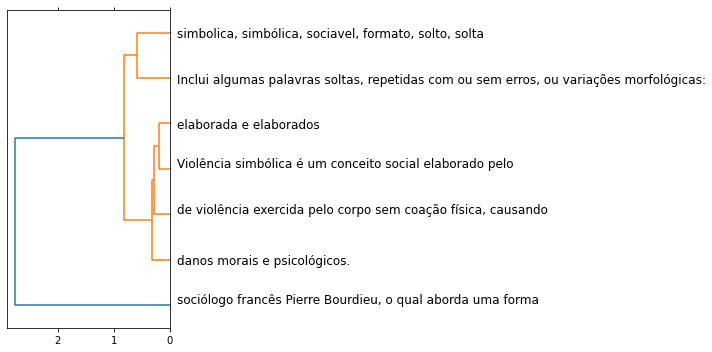

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

dist = cosine_similarity(df_tf_idf) # Calcula similaridade por cosseno

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 5)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=texto);

plt.tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')

plt.tight_layout() 
plt.show()

---
**Exercício 2**: 

Utilizando os mesmos textos que você usou no exercício 1, calcule a similaridade entre eles usando o método do cosseno.

Mostre a matriz de similaridades resultante.

Com base na matriz, usando o método de agrupamento hierarquico, identifique quantos clusters são indicados para o conjunto de dados e quais são os textos que fazem parte de cada cluster.

In [65]:
nltk.download('stopwords')
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stemmer = PortugueseStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

# VETOR DE PESOS TF-IDF
vet_tf_idf = TfidfVectorizer(lowercase=True, stop_words=stopwords_pt, tokenizer=stemmed_words, strip_accents="ascii")
m_tf_idf_palavras = vet_tf_idf.fit_transform(texto_ex1)
df_tf_idf = pd.DataFrame(m_tf_idf_palavras.toarray(), columns=vet_tf_idf.get_feature_names_out())
print(df_tf_idf)

# Matriz similaridade cosseno
df_dist = pd.DataFrame(cosine_similarity(df_tf_idf))
df_dist

       24     70   acus  afric   alta  ampli  anunc   apos  apress    are  \
0  0.0000 0.0000 0.0000 0.0000 0.3644 0.0000 0.0000 0.0000  0.0000 0.0000   
1  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.3941 0.0000   
2  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
3  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.3189  0.0000 0.0000   
4  0.0000 0.0000 0.0000 0.0000 0.0000 0.3536 0.0000 0.0000  0.0000 0.3536   
5  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
6  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
7  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
8  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
9  0.0000 0.3333 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
10 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
11 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'ate', 'del', 'depo', 'estam', 'estav', 'estej', 'estev', 'estiv', 'estivess', 'fom', 'form', 'foss', 'ha', 'haj', 'hao', 'hav', 'houv', 'houveri', 'houvess', 'ja', 'mesm', 'minh', 'muit', 'nao', 'noss', 'par', 'pel', 'quand', 'sao', 'sej', 'sera', 'seri', 'so', 'som', 'tamb', 'tenh', 'ter', 'tera', 'teri', 'tev', 'tinh', 'tiv', 'tivess', 'voc'] not in stop_words.
  % sorted(inconsistent)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0000,0.0000,0.0000,0.1017,0.0000,0.0000,0.1002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0612,0.0633,0.0000,0.0000,0.0000,0.0000,0.0558,0.0661,0.0000,0.0000,0.0000
2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.1017,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0901,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.1002,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0612,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0569,0.0000,0.0000,0.0917,0.0000,0.0501,0.1633,0.0000,0.0000,0.0000
8,0.0000,0.0633,0.0000,0.0000,0.0000,0.0000,0.0000,0.0569,1.0000,0.0000,0.0000,0.0000,0.0000,0.0519,0.0615,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


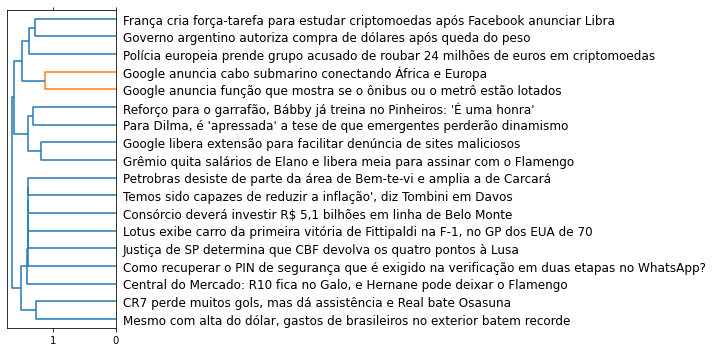

In [66]:
dist = cosine_similarity(df_tf_idf) # Calcula similaridade por cosseno

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 5)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=texto_ex1);

plt.tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')

plt.tight_layout() 
plt.show()

#### Parte III: um caso mais real (*dataset* do Twitter)

O exemplo seguinte carrega alguns tweets de um *dataset* disponibilizado publicamente na Web.

O *dataset* é processado e é criada uma tabela contendo o ID, Data e Hora de publicação e conteúdo de cada tweet. 

In [67]:
import re  # expressões regulares (regex)
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

# local onde está o dataset de Tweets
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00438/Health-News-Tweets.zip'

# carrega os arquivos do dataset a partir do arquivo zip e os coloca em um dicionário {arquivo: conteúdo} 
url_stream = urlopen(url) 
zip_file = ZipFile(BytesIO(url_stream.read()))
arquivo = zip_file.read("Health-Tweets/bbchealth.txt") # carrega um em específico (pois há vários e ficaria um dataset muito grande)

# processa tweets do arquivo, extraindo 'ID', 'Data-Hora' e 'Conteúdo' de cada um (e criando listas com esses dados)
ids = []
datahora = []
tweets = []
conteudo_utf = arquivo.decode('mac-roman')
linhas = [c.split("|") for c in conteudo_utf.split("\n")]
for linha in linhas:
  try:
    ids.append(linha[0])
    datahora.append(linha[1])
    tweets.append(linha[2])
  except: break   # para de carregar quando der algum erro por falta de dado ou dado incorreto

# Cria um dataframe com os dados para para facilitar eventual processamento futuro
df_tweets = pd.DataFrame(list(zip(ids,datahora,tweets)), columns=['ID','DataHora','Tweet'])     # cria dataframe com os tweets
df_tweets['Tweet'] = df_tweets['Tweet'].apply(lambda x: re.split('http[s]?:\/\/.*', str(x))[0]) # remove URLs 

#DESAFIO: implementar remoção de RTs! 

del zip_file, url_stream, arquivo, ids, datahora, tweets # libera memória

df_tweets

,ID,DataHora,Tweet
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater'
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising'
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors
...,...,...,...
3924,384766023120871424,Mon Sep 30 19:45:43 +0000 2013,Baby born after ovaries 'reawakened'
3925,384700230920175617,Mon Sep 30 15:24:17 +0000 2013,Identical triplets born against odds
3926,384678543088562178,Mon Sep 30 13:58:06 +0000 2013,Hospital failed to make improvements
3927,384678542455222273,Mon Sep 30 13:58:06 +0000 2013,New patient targets pledge for NHS


A seguir, selecionamos somente o conteúdo dos tweets e aplicamos as etapas de pré-processamento já vistas a fim de criar uma matriz TF-IDF.

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

sentencas = df_tweets['Tweet'].tolist()

# define um objeto que transforma documentos em matriz de features (tv_idf de termos por tweets)
# um documento por linha e uma palavra por coluna (lista de bag of words)
# detalhes em: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
tf_idf = TfidfVectorizer(lowercase=True,
                         stop_words='english',
                         strip_accents='ascii',
                         ngram_range = (1,1) ) #, # conferir esse

# usa o objeto para criar efetivamente a matriz
matriz_tf_idf = tf_idf.fit_transform(sentencas)

matriz_tf_idf.shape # mostra tamanho da matriz resultante

(3929, 4281)

Podemos verificar que a matriz é efetivamente esparsa.

Perceba que alguns termos são números e eventualmente poderiam ser excluídos:

In [69]:
# Coloca a matriz em um dataframe para podermos analisá-la
# perceba que ela é esparsa
# e muitos elementos são números
df_tfidf = pd.DataFrame(matriz_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())
df_tfidf

,00,000,10,100,10m,11,111,113,12,13,...,yorkshire,young,youngest,youth,youtube,zap,zeneca,zero,zone,zones
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3925,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3926,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3927,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Ao invés de os excluirmos, podemos agrupá-los em um `token` específico, chamado de `#NUMBER`:

In [70]:
# Alternativa para minimizar impacto dos números
def number_normalizer(tokens):
  return ("HASNUMBER" if token[0].isdigit() else token for token in tokens)

class NumberNormalizingVectorizer(TfidfVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        return lambda doc: list(number_normalizer(tokenize(doc)))  

tf_idf = NumberNormalizingVectorizer(lowercase=True,
                         stop_words='english',
                         strip_accents='ascii',
                         ngram_range = (1,1)) # troque para testar com outras possibidades de tokens (p.ex., 1,2, 2,2..)

# usa o objeto para criar efetivamente a matriz
matriz_tf_idf = tf_idf.fit_transform(sentencas)

df_tfidf = pd.DataFrame(matriz_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())
df_tfidf

,HASNUMBER,aback,abandon,aberdeen,able,aboard,abort,aborted,abortion,abortions,...,yorkshire,young,youngest,youth,youtube,zap,zeneca,zero,zone,zones
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3925,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3926,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3927,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Já que a matriz é esparsa, quais termos aparecem nos documentos?

O código seguinte filtra a matriz e ilustra, para cada documento, quais termos aparecem:

In [71]:
# para cada documento, mostra palavras que possuem alguma discriminação
df_tfidf.ne(0).dot(df_tfidf.columns+',').str[:-1]

0         breast,cancer,devised,risk,test
1       bma,care,gp,harming,poll,workload
2         greater,heart,people,risk,short
3              approach,hiv,new,promising
4        coalition,doctors,nhs,undermined
                      ...                
3924         baby,born,ovaries,reawakened
3925         born,identical,odds,triplets
3926    failed,hospital,improvements,make
3927       new,nhs,patient,pledge,targets
3928            diff,inquiry,manslaughter
Length: 3929, dtype: object

A seguir é realizado o processamento completo, incluindo o stemizador:

In [72]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stop_words = ENGLISH_STOP_WORDS 

def number_normalizer(tokens):
  return ("HASNUMBER" if token[0].isdigit() else stemmer.stem(token) for token in tokens if token not in stop_words)

class NumberNormalizingVectorizer(TfidfVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        return lambda doc: list(number_normalizer(tokenize(doc)))  

tf_idf = NumberNormalizingVectorizer(lowercase=True,
                         # stop_words='english',                         
                         strip_accents='ascii',    
                         tokenizer=None,                                        
                         ngram_range = (1,1)) #tokenizer = tokenizer.tokenize)

# usa o objeto para criar efetivamente a matriz
matriz_tf_idf = tf_idf.fit_transform(sentencas)

df_tfidf = pd.DataFrame(matriz_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())
df_tfidf

,HASNUMBER,aback,abandon,aberdeen,abl,aboard,abort,abroad,absenc,absolut,...,york,yorkshir,young,youngest,youth,youtub,zap,zeneca,zero,zone
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3925,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3926,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3927,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Com base nessa matriz, podemos aplicar a clusterização (vai demorar certo tempo):

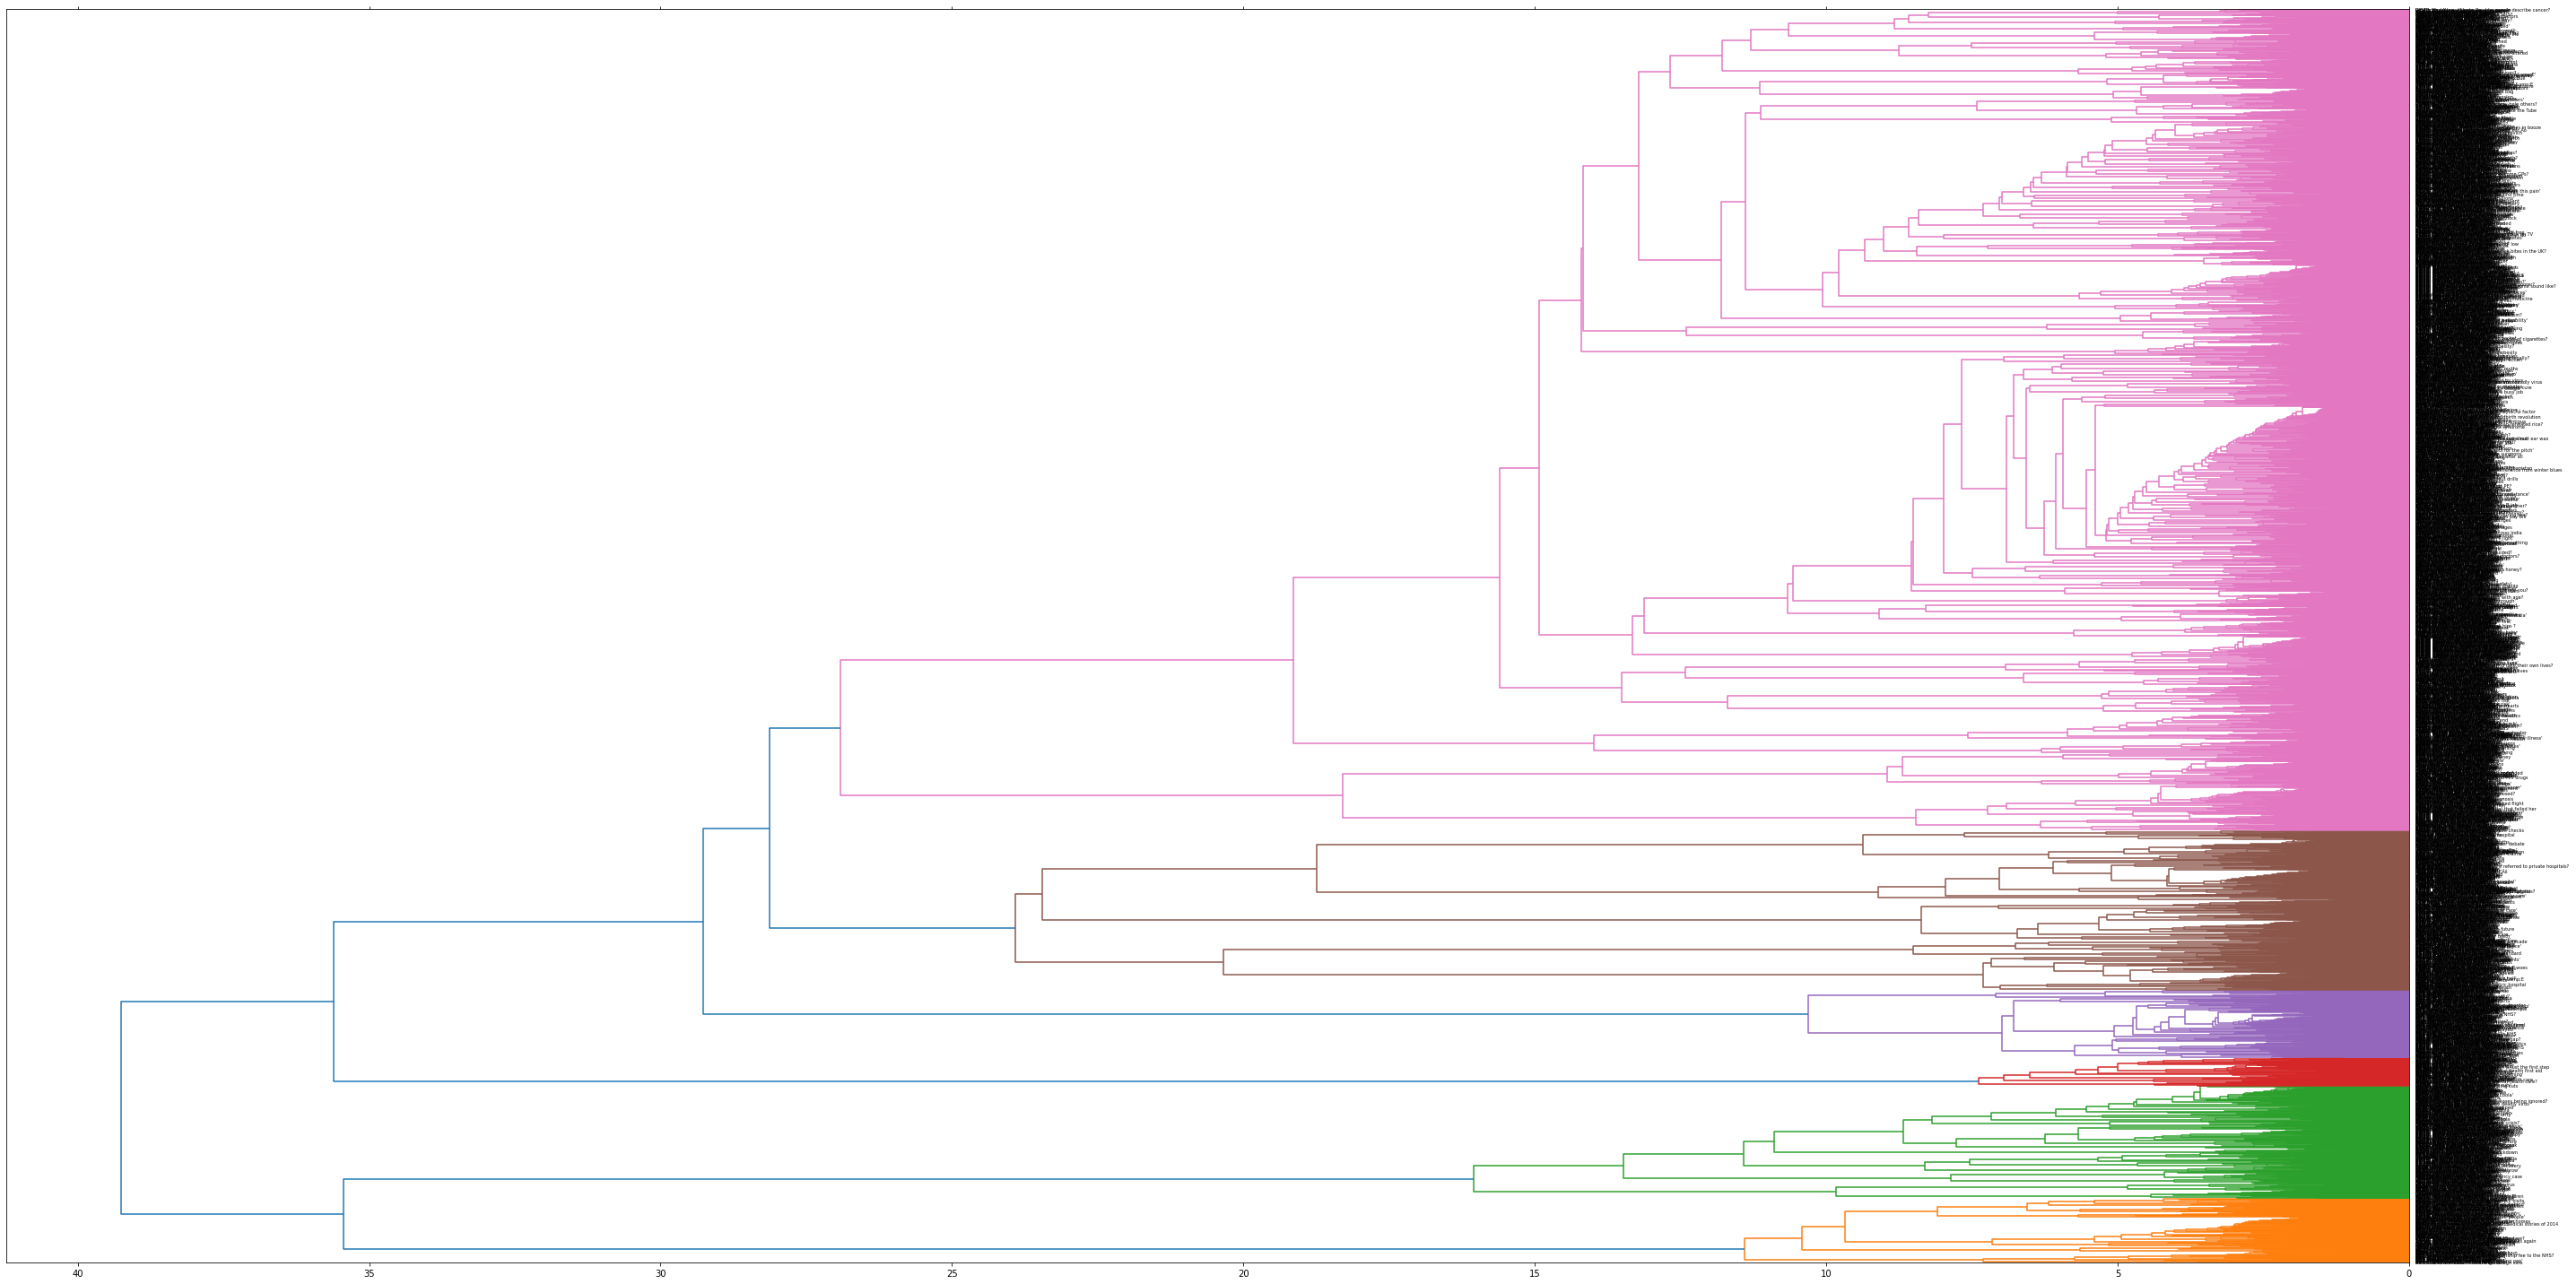

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.cluster import AgglomerativeClustering

dist = cosine_similarity(matriz_tf_idf) # Calcula similaridade por cosseno

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(40, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=sentencas);

plt.tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')

plt.tight_layout() 
plt.show()

Podemos, como já fizemos para outros conjuntos de dados, cortar o processo em determinada posição na árvore (p.ex., quando houver 6 clusters):

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward
from sklearn.cluster import AgglomerativeClustering

dist = cosine_similarity(matriz_tf_idf) # Calcula similaridade por cosseno

linkage_matrix = AgglomerativeClustering(n_clusters=6, linkage='single', affinity='precomputed').fit(dist)

Podemos usar outros algoritmos de clusterização:

In [75]:
# aplica k-means com 6 clusters (parece o indicado no dendrograma)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6).fit(matriz_tf_idf)

pred_labels = kmeans.labels_

Você pode calcular alguns índices para aferir a qualidade dos *clusters*:

In [76]:
from sklearn import metrics

#  DBI score
dbi = metrics.davies_bouldin_score(matriz_tf_idf.toarray(), pred_labels)

# Silhoutte Score
ss = metrics.silhouette_score(matriz_tf_idf.toarray(), pred_labels , metric='euclidean')

print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  7.752033322638632 
Silhoutte Score:  0.01183929062448117


---
**Desafio**: 

Carregue um *dataset* textual disponibilizado pela comunidade (pode ser algum conjunto de textos da biblioteca [Gutenberg](https://pypi.org/project/Gutenberg/) ou o de [notícias disponível na `scikit-learn`](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#loading-the-20-newsgroups-dataset).

Aplique os passos que estudamos a fim de criar a matriz de similaridades. 

Depois, use um método de agrupamento e avalie o resultado.

Para tanto, no caso do *dataset* de livros da biblioteca Gutenberg, avalie se ele agrupa as frases por autor.

No caso do de notícias, avalie se ele chega nas mesmas categorias que estão anotadas no *dataset*.

---
O código seguinte carrega a versão completa do *dataset* caso queira processá-lo (mas ele não funciona no Colab gratuito porque estoura a memória):

In [ ]:
import re  # expressões regulares (regex)
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# local onde está o dataset de Tweets
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00438/Health-News-Tweets.zip'

# carrega os arquivos do dataset a partir do arquivo zip e os coloca em um dicionário {arquivo: conteúdo} 
url_stream = urlopen(url) 
zip_file = ZipFile(BytesIO(url_stream.read()))
arquivos = { 
    nome_arquivo.replace("Health-Tweets/","").replace(".txt",""): 
    zip_file.read(nome_arquivo) for nome_arquivo in zip_file.namelist() if (nome_arquivo.startswith('Health-Tweets') and nome_arquivo.endswith('.txt')) 
    }

# processa tweets dos arquivos extraindo 'ID', 'Data-Hora' e 'Conteúdo' de cada um (e criando listas com esses dados)
ids = []
datahora = []
tweets = []
for (nome, conteudo) in arquivos.items():
  print(f"Processando arquivo {nome}.txt ...")
  conteudo_utf = conteudo.decode('mac-roman')
  linhas = [c.split("|") for c in conteudo_utf.split("\n")]
  for linha in linhas:
    try:
      ids.append(linha[0])
      datahora.append(linha[1])
      tweets.append(linha[2])
    except: break   # para de carregar quando der algum erro por falta de dado ou dado incorreto

# Cria um dataframe com os dados para para facilitar eventual processamento futuro
df_tweets = pd.DataFrame(list(zip(ids,datahora,tweets)), columns=['ID','DataHora','Tweet'])     # cria dataframe com os tweets
df_tweets['Tweet'] = df_tweets['Tweet'].apply(lambda x: re.split('http[s]?:\/\/.*', str(x))[0]) # remove URLs 
#TODO: remover RTs? 

del zip_file, url_stream, arquivos, ids, datahora, tweets # libera memória

sentencas = df_tweets['Tweet'].tolist()

tokenizer = RegexpTokenizer(r'\w+') # define como identificar palavras no texto

# define um objeto que transforma documentos em matriz de features (tv_idf de termos por tweets)
# um documento por linha e uma palavra por coluna (lista de bag of words)
# detalhes em: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
tf_idf = TfidfVectorizer(lowercase=True,
                         stop_words='english',
                         strip_accents='ascii',
                         ngram_range = (1,1) ) #, # conferir esse
 #                        tokenizer = tokenizer.tokenize)

# usa o objeto para criar efetivamente a matriz
matriz_tf_idf = tf_idf.fit_transform(sentencas)

# matriz_tf_idf.shape # mostra tamanho da matriz resultante

# Coloca a matriz em um dataframe para podermos analisá-la
# perceba que ela é esparsa
# e muitos elementos são números
df_tfidf = pd.DataFrame(matriz_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())
df_tfidf

Processando arquivo bbchealth.txt ...
Processando arquivo cbchealth.txt ...
Processando arquivo cnnhealth.txt ...
Processando arquivo everydayhealth.txt ...
Processando arquivo foxnewshealth.txt ...
Processando arquivo gdnhealthcare.txt ...
Processando arquivo goodhealth.txt ...
Processando arquivo KaiserHealthNews.txt ...
Processando arquivo latimeshealth.txt ...
Processando arquivo msnhealthnews.txt ...
Processando arquivo NBChealth.txt ...
Processando arquivo nprhealth.txt ...
Processando arquivo nytimeshealth.txt ...
Processando arquivo reuters_health.txt ...
Processando arquivo usnewshealth.txt ...
Processando arquivo wsjhealth.txt ...
